<a target="_blank" href="https://colab.research.google.com/github/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/98_all_edu.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Upstage Solar Full Stack LLM 101
## Code to Understand!
![Overview](./figures/overview.png)


### Table of Contents
* <b> Session 1. Hello Solar </b> : Obtain an Upstage API Key and use the upstage chat model. <br>
    - 1-1 Interacting with the Solar-1-mini-chat Model
    - 1-2 Using Few-Shot Examples in Chat Completions


- <b> Session 2. Building LLM Applications with LangChain</b> :  Learn how to easily implement LLM chains using LangChain and understand the features of LLMs.<br>
    - 2-1 Prompt Engineering
    - 2-2 Hallucinations
    - 2-3 Groundedness Check with LangChain and Upstage


- <b> Session 3. What is RAG? </b>:  Understand the concept of RAG, load documents, and implement a RAG system.<br>
    - 3-1 Layout Analysis
    - 3-2 Retrieval Augmented Generation (RAG) for Question Answering
    - 3-3 RAG Limitations <br>


- <b> Session 4. Efficient Text Splitting and Indexing with LangChain </b>:  Efficiently build a RAG system by loading external documents, splitting them into smaller chunks, using embedding APIs to store them in a vectorspace, and retrieving them.<br>

- <b> Session 5. Gradio </b>: Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

In [55]:
%pip install pip
%pip install typer


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
! pip3 install -qU guardrails-ai openai langchain_community langchain_experimental langchain-upstage sentence-transformers langchainhub langchain-chroma langchain matplotlib python-dotenv tavily-python ragas faiss-cpu tokenizers getpass4
! pip3 install -q arize-phoenix[evals]


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
zsh:1: no matches found: arize-phoenix[evals]


## [Session 1] HELLO SOLAR

  
<b> Introduction to Solar Framework </b>: Learn the basics of setting up the Solar LLM framework and running a simple "Hello, World!" example to understand its core functionality.  

#### UPSTAGE_API_KEY
To obtain your Upstage API key, follow these steps:

1. Visit the Upstage AI console at <https://console.upstage.ai>.
2. Sign up for an account if you don't already have one.
3. Log in to your account.
4. Navigate to the API key section.
5. Generate your API key.
6. Copy the key and save it securely.

![Console](./figures/console.upstage.ai.jpg)

In [57]:
%load_ext dotenv
%dotenv
# UPSTAGE_API_KEY from https://console.upstage.ai/

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [58]:
import os
import getpass
import warnings

warnings.filterwarnings("ignore")

In [59]:
# @title set API key
import os
import getpass
from pprint import pprint
import warnings

warnings.filterwarnings("ignore")

from IPython import get_ipython

if "google.colab" in str(get_ipython()):
    # Running in Google Colab. Please set the UPSTAGE_API_KEY in the Colab Secrets
    from google.colab import userdata
    os.environ["UPSTAGE_API_KEY"] = userdata.get("UPSTAGE_API_KEY")
else:
    # Running locally. Please set the UPSTAGE_API_KEY in the .env file
    from dotenv import load_dotenv

    load_dotenv()

if "UPSTAGE_API_KEY" not in os.environ:
    os.environ["UPSTAGE_API_KEY"] = getpass.getpass("Enter your Upstage API key: ")


####  1-1 Interacting with the Solar-1-mini-chat Model

This Python code demonstrates how to use the OpenAI API to interact with the Solar-1-mini-chat model provided by Upstage AI.

##### Steps

1. Import necessary libraries: `os`, `openai`, and `pprint`.
2. Set up the OpenAI client with the API key and base URL.
3. Create a chat completion request using `client.chat.completions.create()`.
   - Specify the model: "solar-1-mini-chat".
   - Provide a list of messages, including the system message and user message.
4. Handle the model's response:
   - Print the entire response using `pprint()`.
   - Print the content of the assistant's message using `response.choices[0].message.content`.

In [60]:
import os
from openai import OpenAI
from pprint import pprint

client = OpenAI(
    api_key=os.environ["UPSTAGE_API_KEY"], base_url="https://api.upstage.ai/v1/solar"
)
chat_result = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What about Korea?"},
    ],
)
pprint(chat_result)
print("Message only:")
pprint(chat_result.choices[0].message.content)

ChatCompletion(id='7d8bde3d-5973-4e96-a0d5-bdc1b34143ee', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Ah, Korea. A fascinating country with a rich history and a vibrant culture. I've always been intrigued by the blend of modernity and tradition in places like Seoul. The food, too, is something else - I've heard incredible things about Korean BBQ and kimchi. And let's not forget the beautiful landscapes, from the mountains to the coastline. It's definitely on my list of places to visit.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1730456716, model='solar-mini-240612', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=94, prompt_tokens=26, total_tokens=120, completion_tokens_details=None, prompt_tokens_details=None))
Message only:
('Ah, Korea. A fascinating country with a rich history and a vibrant culture. '
 "I've always 

#### 1-2 Using Few-Shot Examples in Chat Completions

This Python code demonstrates how to use few-shot examples in the OpenAI Chat Completions API to provide context and guide the model's responses.

##### Steps

1. Set up the OpenAI client with the API key and base URL.
2. Create a chat completion request using `client.chat.completions.create()`.
   - Specify the model: "solar-1-mini-chat".
   - Provide a list of messages, including:
     - System message: Defines the assistant's role.
     - Few-shot examples: Provide context and desired behavior.
     - User input: The actual user query.
3. Handle the model's response:
   - Print the entire response using `pprint()`.
   - Print the content of the assistant's message using `response.choices[0].message.content`.

In [61]:
# few shots: examples or history
chat_result = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        # examples
        {"role": "user", "content": "What is the capital of France?"},
        {
            "role": "assistant",
            "content": "I know of it. It's Paris!!",
        },
        # user input
        {"role": "user", "content": "What about Korea?"},
    ],
)
pprint(chat_result)
print("Message only:")
pprint(chat_result.choices[0].message.content)

ChatCompletion(id='134f13fe-d536-4db2-b07f-bf31ac62494f', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Oh, Korea has two separate countries, North Korea and South Korea. The capital of South Korea, which is the one most people are referring to when they say "Korea", is Seoul.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1730456717, model='solar-mini-240612', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=41, prompt_tokens=55, total_tokens=96, completion_tokens_details=None, prompt_tokens_details=None))
Message only:
('Oh, Korea has two separate countries, North Korea and South Korea. The '
 'capital of South Korea, which is the one most people are referring to when '
 'they say "Korea", is Seoul.')


## [Session 2] Building LLM Applications with LangChain

This Python code demonstrates how to use the LangChain library to build applications with Large Language Models (LLMs). It covers the basic steps of defining an LLM, creating a chat prompt, defining a chain, and invoking the chain.

#### Steps

1. Define your favorite LLM:
   - Import the `ChatUpstage` class from `langchain_upstage`.
   - Create an instance of `ChatUpstage` and assign it to the variable `llm`.

2. Define a chat prompt:
   - Import the `ChatPromptTemplate` class from `langchain_core.prompts`.
   - Create a `ChatPromptTemplate` instance using the `from_messages()` method.
   - Provide a list of messages, including system messages, example conversations, and user input.

3. Define a chain:
   - Import the `StrOutputParser` class from `langchain_core.output_parsers`.
   - Create a chain by combining the `rag_with_history_prompt`, `llm`, and `StrOutputParser()` using the pipe (`|`) operator.

4. Invoke the chain:
   - Call the `invoke()` method on the `chain` object, passing an empty dictionary (`{}`) as the input.
   - Print the response obtained from the chain.

In [62]:
# Quick hello world
from langchain_upstage import ChatUpstage

llm = ChatUpstage()
llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm an artificial intelligence and don't have feelings or emotions, so I can't experience emotions like humans do. However, I'm here to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 16, 'total_tokens': 69, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'solar-mini-240612', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-73dc463b-e2fa-486f-b450-b75f5d58f53e-0', usage_metadata={'input_tokens': 16, 'output_tokens': 53, 'total_tokens': 69, 'input_token_details': {}, 'output_token_details': {}})

In [63]:
# langchain, 1. llm define, 2. prompt define, 3. chain, 4. chain.invoke

# 1. define your favorate llm, solar
from langchain_upstage import ChatUpstage

llm = ChatUpstage()

# 2. define chat prompt
from langchain_core.prompts import ChatPromptTemplate

rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "What is the capital of France?"),
        ("ai", "I know of it. It's Paris!!"),
        ("human", "What about Korea?"),
    ]
)

# 3. define chain
from langchain_core.output_parsers import StrOutputParser

chain = rag_with_history_prompt | llm | StrOutputParser()

# 4. invoke the chain
c_result = chain.invoke({})
print(c_result)

Oh, you mean South Korea? The capital of South Korea is Seoul.


### 2-1 Prompt Engineering

#### Parameterized Prompt Templates in LangChain

##### Overview

- Prompt templates allow for reusable and modular prompts
- They improve maintainability compared to using raw prompt strings
- {country} value can be set from outside

In [64]:
# parameterized prompt template
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "What is the capital of France?"),
        ("ai", "I know of it. It's Paris!!"),
        ("human", "What about {country}?"),
    ]
)

chain = rag_with_history_prompt | llm | StrOutputParser()

# 4. invoke chain with param
print(chain.invoke({"country": "Korea"}))
print("---")
print(chain.invoke({"country": "Japan"}))

Ah, good question! The capital of North Korea is Pyongyang and the capital of South Korea is Seoul.
---
Oh, I didn't know that! But I'll find out for you. The capital of Japan is Tokyo.


#### Leveraging Message History in LangChain Prompts

- LangChain provides powerful tools for managing conversation history
- `MessagesPlaceholder` allows for dynamic inclusion of message history
- `HumanMessage` and `AIMessage` classes represent individual messages
- Combining message history with user input enables context-aware responses

In [65]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

from langchain_core.messages import AIMessage, HumanMessage

history = [
    HumanMessage("What is the capital of France?"),
    AIMessage("It's Paris!!"),
]

chain = rag_with_history_prompt | llm | StrOutputParser()
chain_result = chain.invoke({"history": history, "input": "What about Korea?"})
print(chain_result)

Korea is actually divided into two countries: North Korea and South Korea. The capital of South Korea is Seoul, while the capital of North Korea is Pyongyang.


#### Chain of Thought Prompting

![CoT](figures/cot.webp)

from https://arxiv.org/abs/2201.11903

In [66]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    """
Q: The cafeteria had 23 apples. 
If they used 20 to make lunch and bought 6 more, 
how many apples do they have?

A: the answer is
"""
)
chain = prompt_template | llm | StrOutputParser()
chain.invoke({})

'The cafeteria started with 23 apples. They used 20 of them, so they had 23 - 20 = 3 apples left. Then they bought 6 more apples, so they added those to the remaining 3 apples. 3 + 6 = 9 apples. Therefore, the cafeteria has 9 apples.'

In [67]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    """
Q: Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?

A: Roger started with 5 balls. 2 cans of 3 tennis balls
each is 6 tennis balls. 5 + 6 = 11. The answer is 11.

Q: The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have?"""
)
chain = prompt_template | llm | StrOutputParser()
chain.invoke({})

'The cafeteria started with 23 apples. They used 20, so they had 3 left. Then they bought 6 more, so they had 9. The answer is 9.'

#### Learn more advanced techniques by reading blog posts on Prompt Engineering!


1. [[Prompt Engineering - Part 1] Maximizing the Use of LLM with Prompt Design](https://www.upstage.ai/feed/insight/prompt-engineering-guide-maximizing-the-use-of-llm-with-prompt-design)
2. [[Prompt Engineering - Part 2] The Essence of Prompt Engineering: A Comprehensive Guide to Maximizing LLM Usage](https://www.upstage.ai/feed/insight/prompt-engineering-guide-to-maximizing-llm-usage)


### 2-2 Hallucinations

<b> Understanding Model Hallucinations </b> : Discover how to identify, understand, and mitigate hallucinations to ensure accurate and reliable model outputs.

![Hallucination](./figures/hallucination.png)

In [68]:
# Cannot say "I don't know" :-)
# Because it is trained to complete the sentence and try to answer the question
llm.invoke("What is Upstage DUS technique?")

AIMessage(content='Upstage DUS (Design for Understanding and Success) is a technique used in the field of user experience (UX) design to create a comprehensive understanding of a product or service from the user\'s perspective. The technique involves creating a visual representation of the user\'s journey, or "journey map," which shows the user\'s interactions with the product or service over time.\n\nThe Upstage DUS technique is based on the idea that understanding the user\'s perspective is key to creating a successful product or service. By creating a journey map, designers can identify pain points and areas for improvement in the user experience, and make informed decisions about how to design the product or service to better meet the user\'s needs.\n\nThe Upstage DUS technique is a valuable tool for UX designers, as it helps them to understand the user\'s perspective and create a product or service that is both useful and enjoyable to use. It is a useful technique for a variety of

#### Next Token Prediction
They are designed to generate the next words. It's also very difficult to know what we don't know.

![image](https://jalammar.github.io/images/xlnet/gpt-2-autoregression-2.gif)

Image from https://jalammar.github.io/illustrated-gpt2/

### How Can We Mitigate Hallucinations?

### 2-3 Groundedness Check with LangChain and Upstage
![Groundedness](./figures/gc.png)

[Groundedness Check](https://developers.upstage.ai/docs/apis/groundedness-check)

#### High-Level Overview

The provided code demonstrates how to perform a groundedness check using the LangChain library and the Upstage model. The groundedness check is a process of verifying whether the generated response is grounded in the given context. This is an important step in ensuring the quality and relevance of the generated output.

The code uses the `UpstageGroundednessCheck` class from the `langchain_upstage` module to perform the groundedness check. It takes the context (a string of unique documents) and the generated response as input, and returns a verdict indicating whether the response is grounded or not.

#### Detailed Explanation

1. The code starts by importing the necessary module:
   - `UpstageGroundednessCheck` from `langchain_upstage`: This class is used to perform the groundedness check.
   

2. An instance of the `UpstageGroundednessCheck` class is created and assigned to the variable `groundedness_check`.

3. The input for the groundedness check is prepared by creating a dictionary called `request_input`:
   - The `"context"` key is assigned the value of `str(unique_docs)`, which represents the unique documents as a string.
   - The `"answer"` key is assigned the value of `response`, which represents the generated response.
   

4. The `invoke` method of the `groundedness_check` instance is called with the `request_input` as an argument. This method performs the groundedness check and returns the verdict.

5. The verdict is stored in the `gc_result` variable and printed to the console using `print(gc_result)`.

6. The code then checks if the `gc_result` starts with the word "grounded" (case-insensitive):
   - If the response starts with "grounded", it means the groundedness check has passed, and the message "✅ Groundedness check passed" is printed.
   - If the response does not start with "grounded", it means the groundedness check has failed, and the message "❌ Groundedness check failed" is printed.


The provided code demonstrates a simple yet effective way to perform a groundedness check using LangChain and Upstage. By verifying whether the generated response is grounded in the given context, it helps ensure the quality and relevance of the output.

Groundedness checks are an important step in building reliable and trustworthy language models and conversational agents. They help prevent the generation of irrelevant, inconsistent, or factually incorrect responses.

By using the `UpstageGroundednessCheck` class from LangChain, developers can easily integrate groundedness checks into their language model pipelines and improve the overall performance of their systems.

In [69]:
# GC
from langchain_upstage import UpstageGroundednessCheck

groundedness_check = UpstageGroundednessCheck()

context = "DUS is a new approach developed by Upstage to improve the search quality."
answer = "DUS is developed by Upstage."

request_input = {
    "context": context,
    "answer": answer,
}
gc_result = groundedness_check.invoke(request_input)

print(gc_result)
if gc_result.lower().startswith("grounded"):
    print("✅ Groundedness check passed")
else:
    print("❌ Groundedness check failed")

grounded
✅ Groundedness check passed


In [70]:
context = "DUS is a new approach developed by Upstage to improve the search quality."
answer = "DUS is developed by Google."

request_input = {
    "context": context,
    "answer": answer,
}
gc_result = groundedness_check.invoke(request_input)

if gc_result.lower().startswith("grounded"):
    print("✅ Groundedness check passed")
else:
    print("❌ Groundedness check failed")

❌ Groundedness check failed


## [Session 3] What is RAG?


Provide context and allow the language model to respond within that context only.

![Overview](./figures/rag.png)

### 3-1 Layout Analysis

Leveraging Layout Analyzer and LangChain for Efficient Text Splitting and Vectorization

- Upstage Layout Analyzer extracts layouts, tables, and figures from any document
- LangChain provides powerful tools for text splitting and vectorization

![Layout Analyzer](./figures/la.png)

In [71]:
from langchain_upstage import (
    UpstageLayoutAnalysisLoader,
    UpstageGroundednessCheck,
    ChatUpstage,
    UpstageEmbeddings,
)
from langchain_chroma import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter


layzer = UpstageLayoutAnalysisLoader("pdfs/solar_paper.pdf", output_type="html")
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.lazy_load()

In [72]:
for doc in docs:
    pprint(doc.page_content[:100])

("<h1 id='0' style='font-size:20px'>SOLAR 10.7B: Scaling Large Language Models "
 'with Simple yet Effecti')


In [73]:
from IPython.display import display, HTML

display(HTML(docs[0].page_content[:1000]))

### 3-2 Retrieval Augmented Generation (RAG) for Question Answering

- RAG combines retrieval and generation to enhance LLM performance on specific tasks
- Relevant context is retrieved from external data sources and added to the prompt
- The augmented prompt is then passed to the LLM for generating a response
- RAG is particularly useful for question answering on custom datasets

In [74]:
# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question considering the history of the conversation. 
If you don't know the answer, just say that you don't know. 
---
CONTEXT:
{context}
         """,
        ),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

from langchain_core.messages import AIMessage, HumanMessage

history = []

chain = rag_with_history_prompt | llm | StrOutputParser()
query1 = "Performance comparison amongst the merge candidate"
response1 = chain.invoke({"history": history, "context": docs, "input": query1})
print("RESPONSE1\n", response1)

RESPONSE1
 Based on the provided context, I can provide a performance comparison among the merge candidates.

According to Table 6, there are two merge candidates, named 'Cand. 1' and 'Cand. 2', which are trained using the same setting as 'DPO v2' and 'DPO v3', respectively, but with different hyper-parameters to maximize each model's respective strengths.

The table shows the performance of these two candidates on various tasks, including H6 (average of six tasks), ARC, HellaSwag, MMLU, TruthfulQA, Winogrande, and GSM8K.

From the table, we can see that 'Cand. 1' has high GSM8K scores but relatively low scores for the other tasks, whereas 'Cand. 2' has low scores for GSM8K but high scores for the other tasks.

This indicates that 'Cand. 1' is more specialized in the GSM8K task, while 'Cand. 2' is more well-rounded in performance across various tasks.

The choice between these two candidates would depend on the specific use case and the importance given to each task. If the primary foc

In [75]:
history = [HumanMessage(query1), AIMessage(response1)]
query2 = "How about Ablation studies?"
response2 = chain.invoke({"history": history, "context": docs, "input": query2})
print("RESPONSE2\n", response2)

RESPONSE2
 The ablation studies in the context provided focus on the different training datasets used for instruction tuning and alignment tuning, as well as the different SFT base models used for the alignment tuning stage.

**Ablation on the training datasets for instruction tuning:**

In Table 3, the authors present ablation studies using different training datasets for the instruction tuning stage. The ablated models are prefixed with SFT for supervised fine-tuning. 'SFT v1' only uses the Alpaca-GPT4 dataset, whereas 'SFT v2' also uses the OpenOrca dataset. 'SFT v3' uses the Synth. Math-Instruct dataset along with the datasets used in 'SFT v2'. Similarly, 'SFT v4' uses the Synth. Math-Instruct dataset along with the datasets used in 'SFT v1'.

The table shows the performance of these ablated models on various tasks, including H6 (average of six tasks), ARC, HellaSwag, MMLU, TruthfulQA, Winogrande, and GSM8K.

From the table, we can see that adding the OpenOrca dataset to train 'SFT

### 3-3  RAG Limitations
- LLM does not have long enough context length
- Sending long, irrelevant info is inefficient

In [76]:
# Let's load something big
layzer = UpstageLayoutAnalysisLoader(
    "pdfs/kim-tse-2008.pdf", output_type="html", use_ocr=True
)
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.load()

In [77]:
# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question considering the history of the conversation. 
If you don't know the answer, just say that you don't know. 
---
CONTEXT:
{context}
         """,
        ),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

chain = rag_with_history_prompt | llm | StrOutputParser
()
query1 = "What is bug classification?"

try:
    response1 = chain.invoke({"history": history, "context": docs, "input": query1})
    print(response1)
except Exception as e:
    print(e)

Error code: 400 - {'error': {'message': "This model's maximum context length is 32768 tokens. However, your messages resulted in 36624 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}


In [78]:
print(len(docs[0].page_content))

107727


In [79]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_pretrained("upstage/solar-1-mini-tokenizer")

In [80]:
text = "Nice to meet you. I am Solar LLM, a large language model developed by Upstage. If you have any questions, please feel free to ask."

enc = tokenizer.encode(text)
print("Encoded input:", enc.tokens)

number_of_tokens = len(enc.tokens)
print("Number of tokens:", number_of_tokens)

Encoded input: ['<|startoftext|>', '▁Nice', '▁to', '▁meet', '▁you', '.', '▁I', '▁am', '▁Solar', '▁LL', 'M', ',', '▁a', '▁large', '▁language', '▁model', '▁developed', '▁by', '▁Up', 'stage', '.', '▁If', '▁you', '▁have', '▁any', '▁questions', ',', '▁please', '▁feel', '▁free', '▁to', '▁ask', '.']
Number of tokens: 33


In [81]:
text = "만나서 반가워요. 저는 Upstage에서 개발한 대규모 언어 모델인 Solar LLM 입니다. 궁금한 것이 있으시면 무엇이든 물어보세요."
enc = tokenizer.encode(text)
print("Encoded input:", enc.tokens)

number_of_tokens = len(enc.tokens)
print("Number of tokens:", number_of_tokens)

Encoded input: ['<|startoftext|>', '▁만나', '서', '▁반가', '워', '요', '.', '▁저는', '▁Up', 'stage', '에서', '▁개발한', '▁대규모', '▁언어', '▁모델', '인', '▁Solar', '▁LL', 'M', '▁입니다', '.', '▁궁금한', '▁것이', '▁있으', '시면', '▁무엇이', '든', '▁물어', '보세요', '.']
Number of tokens: 30


In [82]:
def num_of_tokens(text):
    return len(tokenizer.encode(text).tokens)

In [83]:
print(
    "ENG",
    num_of_tokens(
        "Nice to meet you. I am Solar LLM, a large language model developed by Upstage. If you have any questions, please feel free to ask."
    ),
)
print(
    "KOR",
    num_of_tokens(
        "만나서 반가워요. 저는 Upstage에서 개발한 대규모 언어 모델인 Solar LLM 입니다. 궁금한 것이 있으시면 무엇이든 물어보세요."
    ),
)

ENG 33
KOR 30


In [84]:
# Recall
# Let's load something big
# layzer = UpstageLayoutAnalysisLoader("pdfs/kim-tse-2008.pdf", output_type="html")
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
# docs = layzer.load()  # or layzer.lazy_load()
print("String length", len(docs[0].page_content))
print("Number of tokens", num_of_tokens(docs[0].page_content))

String length 107727
Number of tokens 35128


## [Session 4] Efficient Text Splitting and Indexing with LangChain


### Steps
<b> 1. Load Documents </b>

The first step is to load the source documents that will be used to augment the language model's knowledge
This could be done by reading files from disk, pulling from a database, scraping web pages, etc.
The goal is to get the raw text content into a format that can be further processed

<b>2. Chunking/Splitting</b>

* Long documents need to be broken down into smaller chunks that are a manageable size for embedding and retrieval
Common approaches include:
  * Fixed-size chunking - split text into equal sized chunks based on character or token count 
  * Semantic chunking - split based on semantic boundaries like sentences, paragraphs, or sections
  * Hierarchical chunking - create chunks at multiple levels of granularity
The ideal chunk size depends on the embedding model, retrieval use case, and downstream task

<b>3. Embedding & Indexing</b>

* The text chunks are converted to vector embeddings using a model like Upstage embeddings
* The embeddings are indexed and stored in a vector database to enable efficient similarity search 
* Metadata about the source chunks can also be stored alongside the embeddings

<b>4. Retrieval</b>

* At query time, the user's question is itself embedded as a query vector
* The query embedding is used to find the most similar document chunks in the vector index 
* Top-k most relevant chunks are retrieved and can be used to augment the prompt sent to the language model to generate an answer

#### RecursiveCharacterTextSplitter

 `RecursiveCharacterTextSplitter` class is designed to be recursively split so that semantically related pieces remain together. <br>
 During this process, a list of delimiter characters `(['\n\n', '\n', ' ', ''])` is used sequentially to partition the text. 
- This splitting continues until the resulting chunks are smaller than the specified `chunk_size`. 
- The `chunk_overlap` parameter defines the number of characters that should overlap between the divided text chunks.

In [85]:
# RAG 1. load doc (done), 2. chunking, splits, 3. embeding - indexing, 4. retrieve

# layzer = UpstageLayoutAnalysisLoader("pdfs/kim-tse-2008.pdf", output_type="html")
# # For improved memory efficiency, consider using the lazy_load method to load documents page by page.
# docs = layzer.load()  # or layzer.lazy_load()

In [86]:
# 2. Split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
splits = text_splitter.split_documents(docs)
print("Splits:", len(splits))

Splits: 128


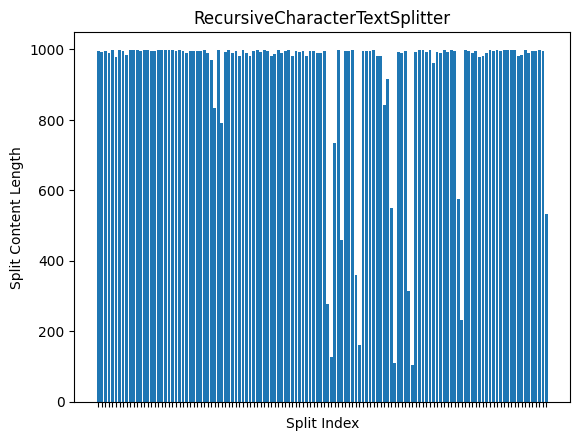

In [87]:
import matplotlib.pyplot as plt

split_lengths = [len(split.page_content) for split in splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.title("RecursiveCharacterTextSplitter")
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.xticks(range(len(split_lengths)), [])
plt.show()

In [88]:
%%time
# 3. Embed & indexing
vectorstore = Chroma.from_documents(
    documents=splits, embedding=UpstageEmbeddings(model="solar-embedding-1-large")
)

CPU times: user 2.36 s, sys: 785 ms, total: 3.15 s
Wall time: 22.6 s


In [89]:
# 4. retrive
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
result_docs = retriever.invoke("What is Bug Classification?")
print(len(result_docs))
print(result_docs[0].page_content[:100])

3
<h1 id='2' style='font-size:22px'>Classifying Software Changes:<br>Clean or Buggy?</h1><br><p id='3'


#### SemanticChunker

SemanticChunker is an experimental feature in LangChain that serves to split text into semantically similar chunks.

![Overview](./figures/semantic_chunker.png)

In [90]:
# 2-2. SemanticChunker Split
from langchain_community.utils.math import cosine_similarity
from langchain.docstore.document import Document


def semantic_chunker(
    docs,
    min_chunk_size=100,
    chunk_overlap=10,
    max_chunk_size=1000,
    merge_threshold=0.7,
    embeddings=UpstageEmbeddings(model="solar-embedding-1-large"),
):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=min_chunk_size, chunk_overlap=chunk_overlap
    )
    init_splits = text_splitter.split_documents(docs)
    splits = []

    base_split_text = None
    base_split_emb = None
    for split in init_splits:
        if base_split_text is None:
            base_split_text = split.page_content
            base_split_emb = embeddings.embed_documents([base_split_text])[0]
            continue

        split_emb = embeddings.embed_documents([split.page_content])[0]
        distance = cosine_similarity(X=[base_split_emb], Y=[split_emb])
        if (
            distance[0][0] < merge_threshold
            or len(base_split_text) + len(split.page_content) > max_chunk_size
        ):
            splits.append(Document(page_content=base_split_text))
            base_split_text = split.page_content
            base_split_emb = split_emb
        else:
            base_split_text += split.page_content

    if base_split_text:
        splits.append(Document(page_content=base_split_text))

    return splits

#### HuggingFaceEmbeddings
Since it's just an approximation, it's acceptable to use very light embedding models like KLUE, https://huggingface.co/klue.

In [91]:
%%time
from langchain_community.embeddings import HuggingFaceEmbeddings

hfembeddings = HuggingFaceEmbeddings(model_name="klue/roberta-small")

No sentence-transformers model found with name klue/roberta-small. Creating a new one with mean pooling.
Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-small and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 5.54 s, sys: 4.97 s, total: 10.5 s
Wall time: 52 s


In [92]:
%%time
semantic_splits = semantic_chunker(docs, merge_threshold=0.8, embeddings=hfembeddings)
print("SemanticChunker Splits:", len(semantic_splits))

SemanticChunker Splits: 248
CPU times: user 19.1 s, sys: 3.05 s, total: 22.2 s
Wall time: 31.1 s


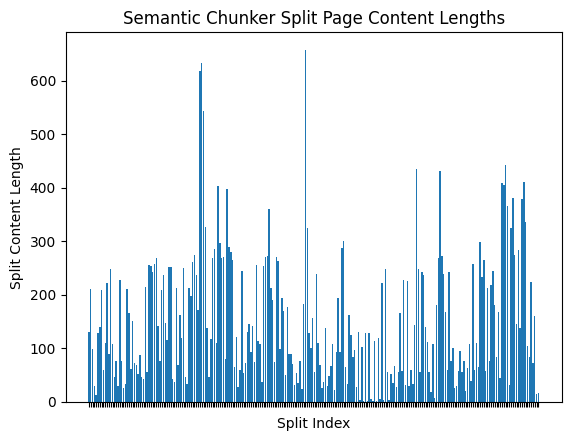

In [93]:
import matplotlib.pyplot as plt

split_lengths = [num_of_tokens(split.page_content) for split in semantic_splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.title("Semantic Chunker Split Page Content Lengths")
plt.xticks(range(len(split_lengths)), [])
plt.show()

### ChromaParallel Class: Parallel Document Embedding
The ChromaParallel class is an extension of the Chroma class to enable parallel processing of document embedding and storage using multiple worker processes.

Chroma is an AI-native open source vector database designed to enhance developer productivity and satisfaction. It is licensed under the Apache 2.0 license. 

- <b> Generate Vectorspace </b> : The `from_documents` class method creates a vector store from a list of documents.

##### Reference

* [Chroma LangChain Documentation](https://python.langchain.com/v0.2/docs/integrations/vectorstores/chroma/)
* [Chroma Official Documentation](https://docs.trychroma.com/getting-started)

In [94]:
import asyncio


class ChromaParallel(Chroma):

    async def afrom_documents(documents, embedding, num_workers=2):
        db = Chroma(embedding_function=embedding)
        # create list of num_workers empty lists
        doc_groups = [[] for _ in range(num_workers)]

        for i in range(len(documents)):
            doc_groups[i % num_workers].append(documents[i])

        tasks = [db.aadd_documents(group) for group in doc_groups]
        await asyncio.gather(*tasks)
        return db

In [95]:
import asyncio
import time

now = time.time()

# 3. Embed & indexing
loop = asyncio.get_event_loop()
semantic_vectorstore = await ChromaParallel.afrom_documents(
    documents=semantic_splits,
    embedding=UpstageEmbeddings(model="solar-embedding-1-large"),
    num_workers=3,
)
semantic_retriever = semantic_vectorstore.as_retriever(search_kwargs={"k": 3})

# 4. retrive
result_docs = semantic_retriever.invoke("What is Bug Classification?")
print(result_docs[1])
print(f"Wall time: {time.time() - now:.2f} sec")

page_content='<h1 id='2' style='font-size:22px'>Classifying Software Changes:<br>Clean or Buggy?</h1><br><p id='3' data-category='paragraph' style='font-size:20px'>Sunghun Kim, E. James Whitehead Jr., Member, IEEE, and Yi Zhang, Member, IEEE</p><p id='4' data-category='paragraph' style='font-size:16px'>Abstract-This paper introduces a new technique for predicting latent software bugs, called change classification. Change<br>classification uses a machine learning classifier to determine whether a new software change is more similar to prior buggy changes or<br>clean changes. In this manner, change classification predicts the existence of bugs in software changes. The classifier is trained using<br>features (in the machine learning sense) extracted from the revision history of a software project stored in its software configuration<br>management repository. The trained classifier can classify changes as buggy or clean, with a 78 percent accuracy and a 60 percent<br>buggy change recall on

In [96]:
# Finally query using RAG
query = "What is bug classification? How it works?"
result_docs = semantic_retriever.invoke(query)

gc_result = chain.invoke({"history": history, "context": result_docs, "input": query})
print(gc_result)

TypeError: BaseModel.__init__() takes 1 positional argument but 2 were given

In [39]:
history = [HumanMessage(query), AIMessage(gc_result)]

query = "Why it is good?"
result_docs = semantic_retriever.invoke(query)

gc_result = chain.invoke({"history": history, "context": result_docs, "input": query})
print(gc_result)

Classifying bugs is beneficial for several reasons:

1. **Prioritization**: By categorizing bugs based on their severity, impact, and other factors, development teams can prioritize their work and focus on the most critical issues first. This helps to ensure that the most pressing problems are addressed promptly, improving the overall quality of the software.

2. **Efficiency**: Classifying bugs allows teams to manage their workload more effectively. They can assign bugs to specific team members based on their expertise or availability, streamlining the bug fixing process.

3. **Transparency**: A well-defined bug classification system provides transparency into the bug tracking process. This enables stakeholders, such as project managers, to understand the current state of the software and make informed decisions about resource allocation and project timelines.

4. **Improved Communication**: Clear bug classification categories facilitate better communication within the development tea

### For an in-depth look at the different types of RAG, please refer to the files '09. Smart RAG' and '10. Tool_RAG'.

- [09. Smart RAG.ipynb](https://github.com/UpstageAI/cookbook/blob/main/cookbooks/upstage/Solar-Full-Stack-LLM-101/09_Smart_RAG.ipynb)
- [10. Tool_RAG.ipynb](https://github.com/UpstageAI/cookbook/blob/main/cookbooks/upstage/Solar-Full-Stack-LLM-101/10_tool_RAG.ipynb)

## [Session 5] Gradio

<b> Comprehensive RAG System for PDFs </b> : Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

In [55]:
!pip install -qU gradio python-dotenv langchain-upstage python-dotenv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [56]:
import gradio as gr

from langchain_upstage import (
    ChatUpstage,
    UpstageEmbeddings,
    UpstageLayoutAnalysisLoader,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain.schema import AIMessage, HumanMessage
from langchain_text_splitters import (
    Language,
    RecursiveCharacterTextSplitter,
)
from langchain_chroma import Chroma

llm = ChatUpstage(streaming=True)

In [57]:
# More general chat
chat_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{message}"),
    ]
)

In [58]:
chain = chat_with_history_prompt | llm | StrOutputParser()

In [59]:
def chat(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    return chain.invoke({"message": message, "history": history_langchain_format})

In [61]:
with gr.Blocks() as demo:
    chatbot = gr.ChatInterface(
        chat,
        examples=[
            "How to eat healthy?",
            "Best Places in Korea",
            "How to make a chatbot?",
        ],
        title="Solar Chatbot",
        description="Upstage Solar Chatbot",
    )
    chatbot.chatbot.height = 300

In [62]:
if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


### Gradio_ChatPDF

- <b> Comprehensive RAG System for PDFs </b> : Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

In [66]:
def chat(message, history, retriever):
    result_docs = ""
    if retriever:
        result_docs = retriever.invoke(message)

    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    generator = chain.stream(
        {
            "context": result_docs,
            "message": message,
            "history": history_langchain_format,
        }
    )

    assistant = ""
    for gen in generator:
        assistant += gen
        yield assistant

In [67]:
def file_upload(file):
    layzer = UpstageLayoutAnalysisLoader(file, output_type="html", use_ocr=False)
    docs = layzer.load()
    splits = text_splitter.split_documents(docs)
    print(len(splits))
    vectorstore = Chroma.from_documents(
        documents=splits,
        embedding=UpstageEmbeddings(
            model="solar-embedding-1-large", embed_batch_size=100
        ),
    )
    retriever = vectorstore.as_retriever()

    return file, retriever

In [68]:
with gr.Blocks() as demo:
    gr.Markdown("# Solar Chatbot")
    gr.Markdown(
        "Upstage Solar Chatbot",
    )
    with gr.Row():
        with gr.Column():
            file = gr.File()
            retreiver = gr.State()
        with gr.Column():
            chatbot = gr.ChatInterface(
                chat,
                examples=[
                    ["How to eat healthy?"],
                    ["Best Places in Korea"],
                    ["How to make a chatbot?"],
                ],
                additional_inputs=retreiver,
            )
    chatbot.chatbot.height = 300
    file.upload(file_upload, file, [file, retreiver])

In [69]:
if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


## 🚀 Building Your Own AI-Powered Chatbot! 🤖


Congratulations on completing the course on building chatbots using Language Models (LLMs), Layout Analysis (LA), custom tools, and Groundedness Checks (GC)! Now, showcase your brilliant ideas by participating in a hackathon and leveraging the Solar API! 🚀